## Import some helpful libraries

In [3]:
## Import some helpful libraries
print("    Version control\n------------------------")
import os, fnmatch, random, math, sys, datetime
from pathlib import Path
import numpy as np;              print("Numpy\t\t", np.__version__)
import matplotlib as mpl;        print("matplotlib\t", mpl.__version__)
import matplotlib.pyplot as plt
import pandas as pd;             print("Pandas\t\t {}".format(pd.__version__))
import h5py;                     print("H5py\t\t {}".format(h5py.__version__))
import tensorflow as tf;         print("TensorFlow\t {}".format(tf.__version__))
import keras;                    print("Keras\t\t {}".format(keras.__version__))
import tensorflow.keras.backend as K
from tensorflow.keras import models, Input, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, BatchNormalization, Conv3D, MaxPooling3D, UpSampling3D, ZeroPadding3D
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.initializers import *
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.engine.topology import Layer, InputSpec
from keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from IPython.display import Image
# import imageio;                  print("imageio\t\t {}".format(imageio.__version__))
# import sklearn;                  print("Scikit-learn\t {}".format(sklearn.__version__))
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from scipy.cluster import hierarchy
# from scipy.cluster.hierarchy import dendrogram, linkage
# import skimage;                  print("Scikit-image\t {}".format(skimage.__version__))
# import nibabel as nib;           print("NiBabel\t\t {}".format(nib.__version__))
# from nibabel.testing import data_path
# %load_ext tensorboard       
# %reload_ext tensorboard

    Version control
------------------------
Numpy		 1.19.4
matplotlib	 3.3.3
Pandas		 1.1.4
H5py		 2.10.0
TensorFlow	 2.4.0
Keras		 2.4.3


## Dataset

In [7]:
## Load all data
sample_name = np.loadtxt(('../Data/data_random_1/raw_data/all_sample_name.csv'), dtype=str, delimiter=",")
all_data = np.load('../Data/data_random_1/raw_data/all.npy').reshape(124,182,218,182,1)
print('all_data shape is {}'.format(all_data.shape)) 

## Padding datasets
all_pad_data = (ZeroPadding3D(padding=(5,19,5))(all_data)).numpy()
print('all_padded_data shape is {}'.format(all_pad_data.shape))

all_data shape is (124, 182, 218, 182, 1)
all_padded_data shape is (124, 192, 256, 192, 1)


In [6]:
## Show the list of files
print("samThere are", len(sample_name), " subset of train samples are:\n")
print(*sample_name, sep='\t')

samThere are 124  subset of train samples are:

Pat_100_1-post.nii.gz	Pat_101_1-post.nii.gz	Pat_102_1-post.nii.gz	Pat_103_1-post.nii.gz	Pat_107_1-post.nii.gz	Pat_108_1-post.nii.gz	Pat_109_1-post.nii.gz	Pat_10_1-post.nii.gz	Pat_110_1-post.nii.gz	Pat_113_1-post.nii.gz	Pat_114_1-post.nii.gz	Pat_115_1-post.nii.gz	Pat_116_1-post.nii.gz	Pat_117_1-post.nii.gz	Pat_118_1-post.nii.gz	Pat_11_1-post.nii.gz	Pat_121_1-post.nii.gz	Pat_122_1-post.nii.gz	Pat_123_1-post.nii.gz	Pat_125_1-post.nii.gz	Pat_126_1-post.nii.gz	Pat_127_1-post.nii.gz	Pat_128_1-post.nii.gz	Pat_129_1-post.nii.gz	Pat_12_1-post.nii.gz	Pat_130_1-post.nii.gz	Pat_131_1-post.nii.gz	Pat_132_1-post.nii.gz	Pat_135_1-post.nii.gz	Pat_137_1-post.nii.gz	Pat_138_1-post.nii.gz	Pat_139_1-post.nii.gz	Pat_13_1-post.nii.gz	Pat_140_1-post.nii.gz	Pat_141_1-post.nii.gz	Pat_142_1-post.nii.gz	Pat_143_1-post.nii.gz	Pat_144_1-post.nii.gz	Pat_145_1-post.nii.gz	Pat_14_1-post.nii.gz	Pat_15_1-post.nii.gz	Pat_16_1-post.nii.gz	Pat_17_1-post.nii.gz	Pat_18_1-post.

In [11]:
## Dividing the all_pad_data into five sections consequently
data1 = all_pad_data[0:25,:,:,:]
data2 = all_pad_data[25:50,:,:,:]
data3 = all_pad_data[50:75,:,:,:]
data4 = all_pad_data[75:100,:,:,:]
data5 = all_pad_data[100:,:,:,:]
print("data1 has the shape of {}".format(data1.shape))
print("data2 has the shape of {}".format(data2.shape))
print("data3 has the shape of {}".format(data3.shape))
print("data4 has the shape of {}".format(data4.shape))
print("data5 has the shape of {}".format(data5.shape))

data1 has the shape of (25, 192, 256, 192, 1)
data2 has the shape of (25, 192, 256, 192, 1)
data3 has the shape of (25, 192, 256, 192, 1)
data4 has the shape of (25, 192, 256, 192, 1)
data5 has the shape of (24, 192, 256, 192, 1)


In [28]:
sample_name1 = sample_name[0:25]
sample_name2 = sample_name[25:50]
sample_name3 = sample_name[50:75]
sample_name4 = sample_name[75:100]
sample_name5 = sample_name[100:]
print("\nThere are", len(sample_name1), "samples in data1 as:\n")
print(*sample_name1, sep='\t')
print("\nThere are", len(sample_name2), "samples in data2 as:\n")
print(*sample_name2, sep='\t')
print("\nThere are", len(sample_name3), "samples in data3 as:\n")
print(*sample_name3, sep='\t')
print("\nThere are", len(sample_name4), "samples in data4 as:\n")
print(*sample_name4, sep='\t')
print("\nThere are", len(sample_name5), "samples in data5 as:\n")
print(*sample_name5, sep='\t')


There are 25 samples in data1 as:

Pat_100_1-post.nii.gz	Pat_101_1-post.nii.gz	Pat_102_1-post.nii.gz	Pat_103_1-post.nii.gz	Pat_107_1-post.nii.gz	Pat_108_1-post.nii.gz	Pat_109_1-post.nii.gz	Pat_10_1-post.nii.gz	Pat_110_1-post.nii.gz	Pat_113_1-post.nii.gz	Pat_114_1-post.nii.gz	Pat_115_1-post.nii.gz	Pat_116_1-post.nii.gz	Pat_117_1-post.nii.gz	Pat_118_1-post.nii.gz	Pat_11_1-post.nii.gz	Pat_121_1-post.nii.gz	Pat_122_1-post.nii.gz	Pat_123_1-post.nii.gz	Pat_125_1-post.nii.gz	Pat_126_1-post.nii.gz	Pat_127_1-post.nii.gz	Pat_128_1-post.nii.gz	Pat_129_1-post.nii.gz	Pat_12_1-post.nii.gz

There are 25 samples in data2 as:

Pat_130_1-post.nii.gz	Pat_131_1-post.nii.gz	Pat_132_1-post.nii.gz	Pat_135_1-post.nii.gz	Pat_137_1-post.nii.gz	Pat_138_1-post.nii.gz	Pat_139_1-post.nii.gz	Pat_13_1-post.nii.gz	Pat_140_1-post.nii.gz	Pat_141_1-post.nii.gz	Pat_142_1-post.nii.gz	Pat_143_1-post.nii.gz	Pat_144_1-post.nii.gz	Pat_145_1-post.nii.gz	Pat_14_1-post.nii.gz	Pat_15_1-post.nii.gz	Pat_16_1-post.nii.gz	Pat_17_1-po

## Showing slices

In [29]:
## Main Function
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices), figsize=(10,5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="hot", origin="upper") # hot, Greys, gray

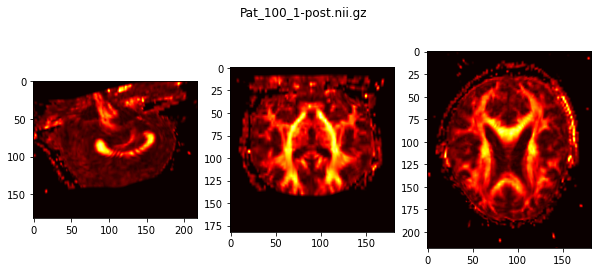

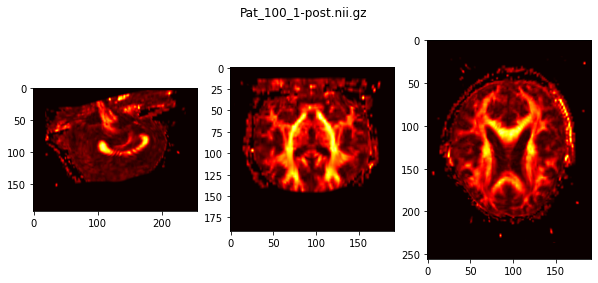

In [30]:
## Showing Original All samples
for m in range(1):
    slice_0 = all_data[m, 91, :, :, 0]
    slice_1 = all_data[m, :, 109, :, 0]
    slice_2 = all_data[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_name[m], x=0.5, y=0.9)

## Showing Padded All samples
for m in range(1):
    slice_3 = all_pad_data[m, 96, :, :, 0]
    slice_4 = all_pad_data[m, :, 128, :, 0]
    slice_5 = all_pad_data[m, :, :, 96, 0]
    show_slices([slice_3, slice_4, slice_5])
    plt.suptitle(sample_name[m], x=0.5, y=0.9)

## Model design

In [40]:
## Convolutional AutoEncoder Model Designe:

BATCH_SIZE = 1
EPOCHS = 1

IMAGE_HEIGHT = all_pad_data.shape[1]
IMAGE_WIDTH  = all_pad_data.shape[2]
IMAGE_DEPTH  = all_pad_data.shape[3]
data_shape = [1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
input_shape = [BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
print("Padded data shape: {}\n".format(input_shape))

## Encoder
input_img = Input(shape=(192, 256, 192, 1), name='Input')
x1 = Conv3D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv1')(input_img)
x1 = BatchNormalization(name='BN_Conv1')(x1)
x2 = Conv3D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv2')(x1)
x2 = BatchNormalization(name='BN_Conv2')(x2)
x3 = Conv3D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv3')(x2)
x3 = BatchNormalization(name='BN_Conv3')(x3)
x4 = Conv3D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv4')(x3)
x4 = BatchNormalization(name='BN_Conv4')(x4)

## Latent Features
shape_before_flattening = tf.keras.backend.int_shape(x4)
x_LF = Flatten(name='LF')(x4)
encoded = x_LF
x5 = Reshape(shape_before_flattening[1:], name='UnFlat')(encoded)

## Decoder
x5 = Conv3D(filters=16, kernel_size=3, padding='same', activation='relu', name='DeConv3')(x5)
x5 = BatchNormalization(name='BN_DeConv3')(x5)
x5 = UpSampling3D(size=(2, 2, 2), name='UpSampling3')(x5)
x6 = Conv3D(filters=32, kernel_size=3, padding='same', activation='relu', name='DeConv4')(x5)
x6 = BatchNormalization(name='BN_DeConv4')(x6)
x6 = UpSampling3D(size=(2, 2, 2), name='UpSampling4')(x6)
x7 = Conv3D(filters=64, kernel_size=3, padding='same', activation='relu', name='DeConv5')(x6)
x7 = BatchNormalization(name='BN_DeConv5')(x7)
x7 = UpSampling3D(size=(2, 2, 2), name='UpSampling5')(x7)
x8 = Conv3D(filters=128, kernel_size=3, padding='same', activation='relu', name='DeConv6')(x7)
x8 = BatchNormalization(name='BN_DeConv6')(x8)
x8 = UpSampling3D(size=(2, 2, 2), name='UpSampling6')(x8)
decoded = Conv3D(filters=1, kernel_size=3, padding='same', activation='sigmoid', name='Output')(x8)

model_CAE = Model(inputs=input_img, outputs=decoded, name='AutoEncoder')
## optimizer=rmsprop, sgd
model_CAE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_CAE.summary()
# plot_model(model_CAE, to_file='Convolutional_autoencoder_model.png', show_shapes=True)
# Image(filename='Convolutional_autoencoder_model.png')

Padded data shape: [1, 192, 256, 192, 1]

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 192, 256, 192, 1) 0         
_________________________________________________________________
Conv1 (Conv3D)               (None, 96, 128, 96, 128)  3584      
_________________________________________________________________
BN_Conv1 (BatchNormalization (None, 96, 128, 96, 128)  512       
_________________________________________________________________
Conv2 (Conv3D)               (None, 48, 64, 48, 64)    221248    
_________________________________________________________________
BN_Conv2 (BatchNormalization (None, 48, 64, 48, 64)    256       
_________________________________________________________________
Conv3 (Conv3D)               (None, 24, 32, 24, 32)    55328     
_________________________________________________________________
BN_Conv3 (Bat

## Model training

In [ ]:
for step in range(5):
    print("================================\nThis is step {}".format(step + 1))
    if (step + 1) == 1: data = np.concatenate((data1, data2, data3, data4), axis=0)
    if (step + 1) == 2: data = np.concatenate((data1, data2, data3, data5), axis=0)
    if (step + 1) == 3: data = np.concatenate((data1, data2, data4, data5), axis=0)
    if (step + 1) == 4: data = np.concatenate((data1, data3, data4, data5), axis=0)
    if (step + 1) == 5: data = np.concatenate((data2, data3, data4, data5), axis=0)
    print("and the shape of training data is {}".format(data.shape))

    ## Start time:
    from datetime import datetime
    start_time = datetime.now().strftime("%Y_%m_%d___%H_%M"); print("\nStart Time =", start_time, "\n")

    ## Model Fit
    # model_CAE.load_weights('./Weights/P4_36864___2021_01_07___11_42.hdf5', by_name=True)  # epochs 1001_1500
    tb_callback = TensorBoard(('./Logs/Step_' + str(step) + '_' + start_time), histogram_freq=1)
    model_CAE.fit(data, data, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, callbacks=[tb_callback], verbose=1)
    model_CAE.save_weights('./Weights/Step_' + str(step) + '_' + start_time + '.hdf5')

    ## End time:
    from datetime import datetime
    end_time = datetime.now().strftime("%Y_%m_%d___%H_%M"); print("\nEnd Time =", end_time)

This is step 1
and shape of train data is (100, 192, 256, 192, 1)

Start Time = 2021_02_21___00_16 

  2/100 [..............................] - ETA: 5:00:51 - loss: 0.3042 - accuracy: 0.4000

## Image reconstruction

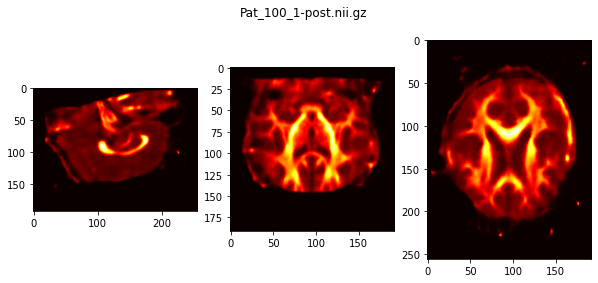

In [10]:
## Reconstructing a Train data 
test_pad_data = train_pad_data[0,:].reshape(1, 192, 256, 192, 1)
# ## Reconstructing a Valid data 
# test_pad_data = valid_pad_data[0,:].reshape(1, 192, 256, 192, 1)

reconstructed = model_CAE.predict(test_pad_data)
for m in range(1):
    slice_0 = reconstructed[m, 96, :, :, 0]
    slice_1 = reconstructed[m, :, 128, :, 0]
    slice_2 = reconstructed[m, :, :, 96, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_train_subset[m], x=0.5, y=0.9)

In [11]:
## Showing some of voxels
print('\ntrain_pad_data[0,96,125:130,96]\n\n {}'.format(train_pad_data[0,96,125:130,96]),'\n')
print('\nReconstructed_data[0,96,125:130,96]\n\n {}'.format(reconstructed[0,96,125:130,96]),'\n')


train_pad_data[0,96,125:130,96]

 [[0.19734716]
 [0.17220303]
 [0.13873336]
 [0.17750186]
 [0.20233598]] 


Reconstructed_data[0,96,125:130,96]

 [[0.17174333]
 [0.15899315]
 [0.15013295]
 [0.14244062]
 [0.14945677]] 



## Weights of model

In [12]:
# ## Weights of Full-Model

# h5_file = h5py.File(('./Weights/P4_36864___2021_01_04___22_13.hdf5'), 'r')

# print(h5_file)
# Layer_size = len(list(h5_file.keys()))
# Layer_names = list(h5_file.keys())
# print("\nThere are", Layer_size, "layers in this model, named as:\n\n", Layer_names,'\n')
# print('====================================================================\n')
# for l in range(12, 13):  # Conv & Deconv (12, 23)
#     layers = h5_file[Layer_names[l]]
#     print("Layer", l+1, "-----", layers)
#     W = layers[Layer_names[l]]['kernel:0']
#     print('Layer', list(h5_file.keys())[l], '\tWeights\' shape: {}'.format(W.shape), '\n')
#     print('\nWeights[0][0][0][0][0]: {}'.format(W[0][0][0][0][0:3]))    # Weights[1][1][1][0][1]
#     print('====================================================================\n')
#     Kernel_1 = W.shape[0]
#     Kernel_2 = W.shape[1]
#     Kernel_3 = W.shape[2]
#     Kernel_all = np.zeros([Kernel_1, Kernel_2, Kernel_3])
#     for f in range(W.shape[4]):   # W.shape[4]
#         for x in range(Kernel_1):
#             for y in range(Kernel_2):
#                 for z in range(Kernel_3):
#                     Kernel_all[x][y][z] = W[x][y][z][0][f]
# #         print('\nWeights of kernel', f+1, 'of', W.shape[4], ':\n\n', Kernel_all)

## LF features

In [13]:
## Encoder model design

model_Encoder = Model(inputs=input_img, outputs=encoded, name='Encoder')
model_Encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# model_Encoder.summary()
# plot_model(model_Encoder, to_file='Encoder_model.png', show_shapes=True)
# Image(filename='Encoder_model.png')

LF_features size: (36864,) -------- <class 'numpy.ndarray'> 

The first feature is -0.12437891960144043

The LF feature vector is:
[-0.12437892  1.6480687  -0.07434261 ... -0.77945465 -0.48300916
 -0.8795147 ]

(12, 16, 12, 16)


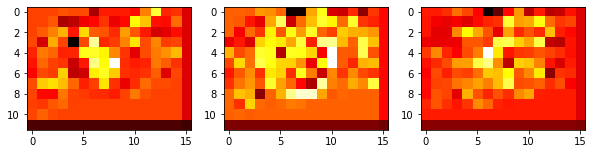

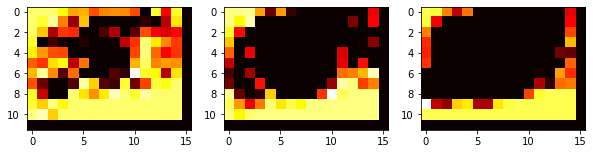

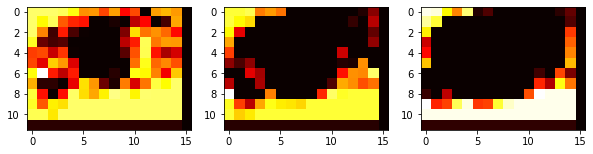

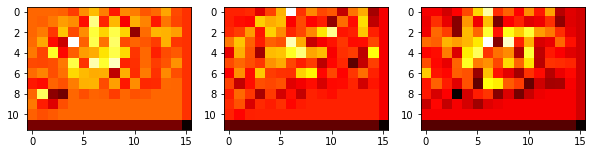

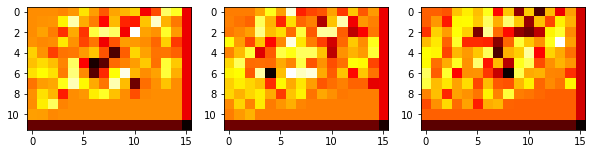

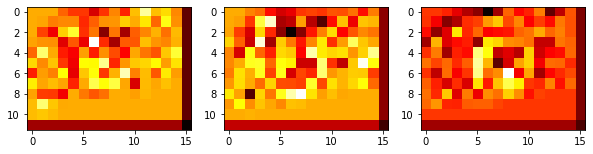

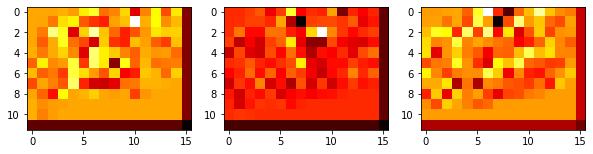

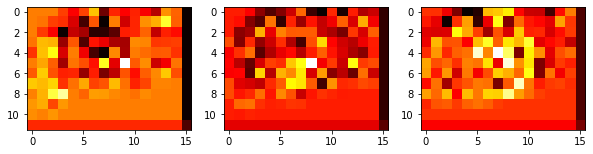

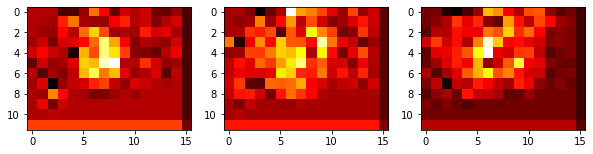

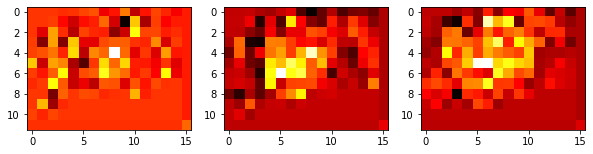

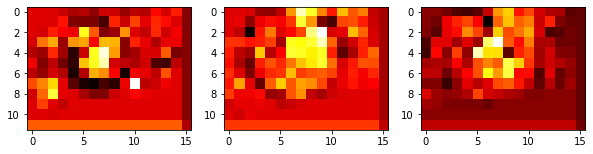

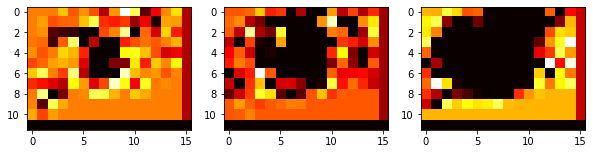

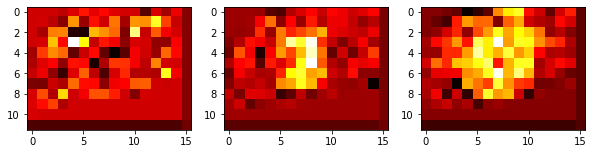

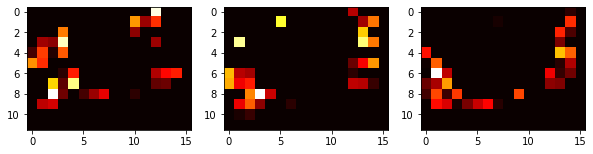

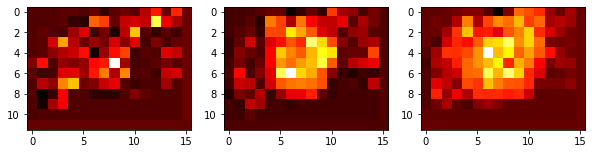

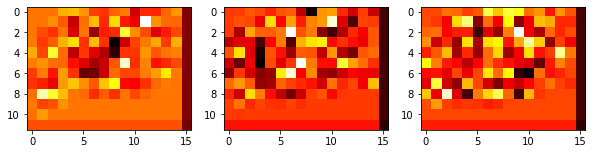

In [14]:
## Showing LF vector for train sample

test_pad_data = train_pad_data[0,:].reshape(1, 192, 256, 192, 1)

LF_features = model_Encoder.predict(test_pad_data)[0]

print('LF_features size: {} -------- {} \n'.format(LF_features.shape, type(LF_features)))
print('The first feature is {}\n'.format(LF_features[0]))
print('The LF feature vector is:\n{}\n'.format(LF_features))

## Showing LF image for train sample
LLL = LF_features.reshape(12,16,12,16)
print(LLL.shape)   #(1, 192, 256, 192, 1)
for m in range(16):
    slice_0 = LLL[0, :, :, m]
    slice_1 = LLL[1, :, :, m]
    slice_2 = LLL[2, :, :, m]
    show_slices([slice_0, slice_1, slice_2])

In [15]:
## Activate TensorBoard

# tensorboard --logdir=Logs       ## http://localhost:6006/

## LF_matrix as a numpy array

In [16]:
# ## Producing and saving LF_matrix as a numpy array

# a = []
# for p in range (len(val_name)):
#     test_pad_data = valid_pad_data[p,:].reshape(1, 192, 256, 192, 1)
#     LF_features = model_Encoder.predict(test_pad_data)[0]
#     a.append(LF_features)
#     print(p)
# for p in range (len(train_name)):
#     test_pad_data = train_pad_data[p,:].reshape(1, 192, 256, 192, 1)
#     LF_features = model_Encoder.predict(test_pad_data)[0]
#     a.append(LF_features)
#     print(p)

# LF_matrix = np.array(a)
# print(LF_matrix.shape)
# print(type(LF_matrix))
# np.save('./Data/LF/LF_e1500', LF_matrix)

## Clustering

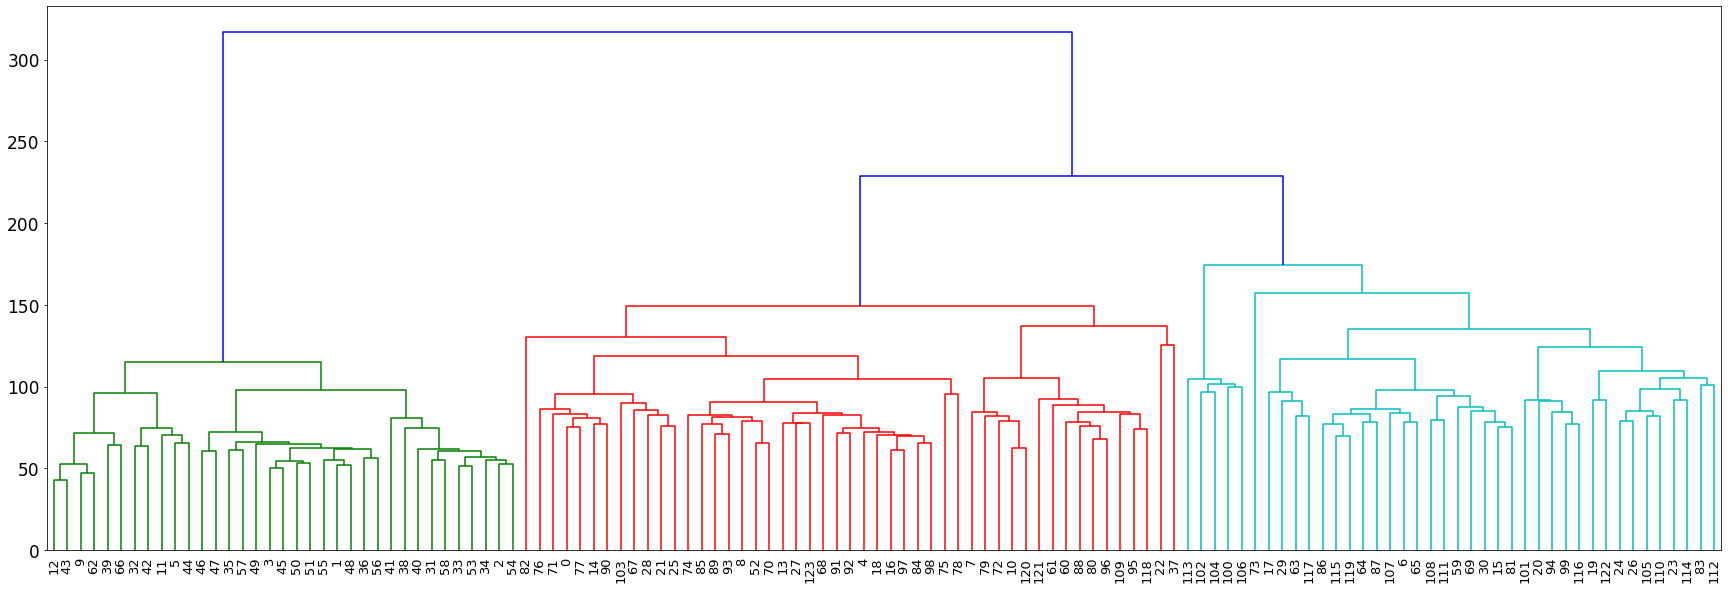

In [17]:
## Hierarchical Clustering

LF_matrix = np.load('../Data/data_random_1/LF/LF_e1500.npy')

from matplotlib.pyplot import cm
plt.figure(figsize=(30, 10))
# plt.grid()
linked = linkage(LF_matrix, method='ward', metric='euclidean')   # ward , single , complete , weighted, average , centroid
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)  # descending
cmap = cm.rainbow(np.linspace(0, 1, 2))
# hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
# hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=17)
plt.show()

In [18]:
## K-Means Clustering

LF_matrix = np.load('../Data/data_random_1/LF/LF_e1500.npy')

print(LF_matrix.shape, '\n')
kmeans = KMeans(n_clusters=4, random_state=0).fit(LF_matrix)
cluster_labels = kmeans.labels_
print(cluster_labels, '\n\n\n')

cluster_predict = kmeans.predict(LF_matrix[:])
# print(cluster_predict, '\n\n\n')

cluster_center = kmeans.cluster_centers_
# print(cluster_center.shape, '\n\n', cluster_center)

(124, 36864) 

[2 0 0 0 2 2 2 2 2 0 0 0 0 2 2 3 1 1 2 1 3 1 1 2 1 2 3 1 2 1 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 2 2 2 0 2 1 3 2 2 2 1
 2 2 2 2 2 2 2 2 3 1 2 2 1 2 2 2 2 2 2 1 3 2 2 2 1 3 3 3 3 2 3 1 3 1 1 2 1
 1 3 3 1 1 3 1 2 1 0 2 1 2] 





## LF_matrix as a DataFrame

In [19]:
## Define some variables

rows = []
val_name = sample_val_subset
train_name = sample_train_subset

In [20]:
# ##Refining sample names

# for p in range (len(val_name)):
#     Pat_name = val_name[:][p]
#     if Pat_name[7] == '_':
#         Pat_name = Pat_name[0:9]
#     elif Pat_name[6] == '_':
#         Pat_name = Pat_name[0:4] + '0' + Pat_name[4:8]
#     else:
#         Pat_name = Pat_name[0:4] + '00' + Pat_name[4:7]
#     rows.append([Pat_name])

# for p in range (len(train_name)):
#     Pat_name = train_name[:][p]
#     if Pat_name[7] == '_':
#         Pat_name = Pat_name[0:9]
#     elif Pat_name[6] == '_':
#         Pat_name = Pat_name[0:4] + '0' + Pat_name[4:8]
#     else:
#         Pat_name = Pat_name[0:4] + '00' + Pat_name[4:7]
#     rows.append([Pat_name])
# rows

In [21]:
## Considering different cluster-labels based on different epochs

# for p in range(124):
#     rows[p].append(cluster_labels[p])    # e300
#     rows[p].append(cluster_labels[p])    # e500
#     rows[p].append(cluster_labels[p])    # e1000
#     rows[p].append(cluster_labels[p])    # e1500
#     rows[p].append(0)    # difference
# rows

In [22]:
# ## Index and Column names of DataFrame

# df = pd.DataFrame(rows, columns=["Pat_name", "class_e300", "class_e500", "class_e1000", "class_e1500", "same_clusters"])
# # print(df)

In [23]:
# ## Engineering of DataFrame and saving

# df['class_e500'][df['class_e500'] == 2] = 7
# df['class_e500'][df['class_e500'] == 0] = 2
# df['class_e500'][df['class_e500'] == 7] = 0

# df['class_e1000'][df['class_e1000'] == 3] = 7
# df['class_e1000'][df['class_e1000'] == 0] = 3
# df['class_e1000'][df['class_e1000'] == 7] = 0

# df['class_e1500'][df['class_e1500'] == 2] = 7
# df['class_e1500'][df['class_e1500'] == 1] = 2
# df['class_e1500'][df['class_e1500'] == 7] = 1

# for r in range (124):
#     if ((df['class_e300'][r] == df['class_e500'][r]) and 
#         (df['class_e1000'][r] == df['class_e500'][r]) and 
#         (df['class_e1000'][r] == df['class_e1500'][r])):
#         df['same_clusters'][r] = 1
# print(df)

# df.index = df[df.columns[0]]
# df = df.drop(['Pat_name'], axis=1)
# df = df.sort_index()

# df.to_csv(r'./Data/Pat_Class.csv', index=False)
# df

In [24]:
# ## Engineering of DataFrame and saving new Cluster-Score for epochs 500 and 1500

df = pd.read_csv('../Data/data_random_1/LF/Pat_Class_py.csv')
df = df.drop(['class_e300', 'class_e1000'], axis=1)

for r in range (124):
    if ((df['class_e1500'][r] == df['class_e500'][r])):
        df['same_clusters'][r] = 1

df.index = df[df.columns[0]]
df = df.drop(['ID'], axis=1)

print('Among 124 patients, there are {} patients with different clusters in different epochs of 500 and 1500\n'.format(124 - df['same_clusters'].sum()))
# df.to_csv(r'./Data/LF/Pat_Class_new.csv')
df

Among 124 patients, there are 27 patients with different clusters in different epochs of 500 and 1500



/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,class_e500,class_e1500,same_clusters
ID,,,
Pat_001_1,1,1,1
Pat_002_1,0,2,0
Pat_003_1,1,3,0
Pat_004_1,0,0,1
Pat_005_1,1,1,1
...,...,...,...
Pat_141_1,0,0,1
Pat_142_1,0,0,1
Pat_143_1,0,0,1


In [25]:
## Loading DataFrame

df = pd.read_csv('../Data/data_random_1/LF/Pat_Class_py.csv')

df.index = df[df.columns[0]]
df = df.drop(['ID'], axis=1)
# df = df.drop(['same_clusters'], axis=1)
print('There are {} patients with different clusters in different-epochs training!\n\n'.format(124 - df['same_clusters'].sum()))
df

There are 40 patients with different clusters in different-epochs training!




,class_e300,class_e500,class_e1000,class_e1500,same_clusters
ID,,,,,
Pat_001_1,1,1,0,1,0
Pat_002_1,2,0,0,2,0
Pat_003_1,2,1,1,3,0
Pat_004_1,0,0,0,0,1
Pat_005_1,1,1,1,1,1
...,...,...,...,...,...
Pat_141_1,0,0,0,0,1
Pat_142_1,0,0,0,0,1
Pat_143_1,0,0,0,0,1


## Scatter plot of K-means Clustering

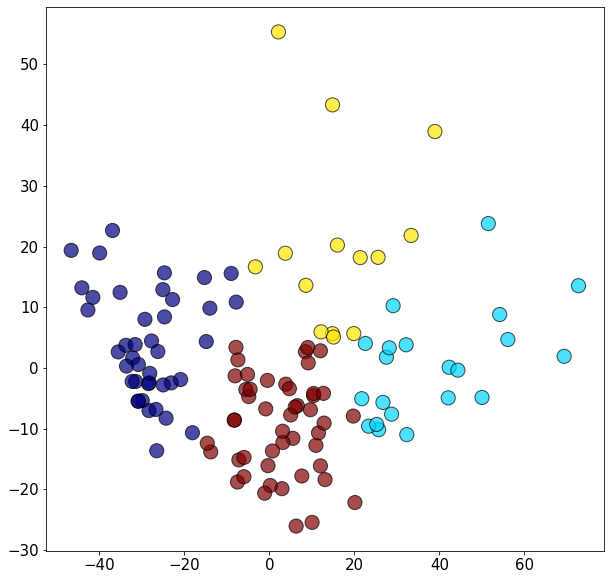

In [26]:
## PCA >>> Scatter plot >>> K-means Clustering

LF_matrix = np.load('../Data/data_random_1/LF/LF_e1500.npy')

## PCA analysis
pca = PCA(n_components=2)
pca.fit(LF_matrix)
LF_matrix_pca = pca.transform(LF_matrix)

## K-means of PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(LF_matrix_pca)
y_kmeans = kmeans.predict(LF_matrix_pca)

## Scatter Plot
plt.figure(figsize=(10, 10))
# plt.grid()
plt.scatter(LF_matrix_pca[:,0], LF_matrix_pca[:,1], c=y_kmeans, s=200, cmap='jet', edgecolors='k', alpha=0.7)
plt.gca().tick_params(axis='x', which='major', labelsize=15)
plt.gca().tick_params(axis='y', which='major', labelsize=15)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


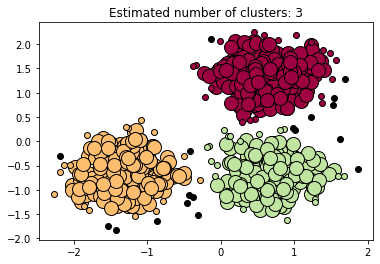

In [27]:
## DBSCAN Clustering

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [28]:
# ## Generating LF_500 DataFrame with clustering scores

# df_index = pd.DataFrame(rows, columns=["ID"])
# LF_matrix = np.load('../Data/data_random_1/LF_e500.npy')
# LF = pd.DataFrame(LF_matrix)
# LF = pd.concat([df_index, LF], axis=1)
# LF = LF.sort_index()
# Pat_Class = pd.read_csv('./Data/LF/Pat_Class_new.csv')
# df = pd.merge(Pat_Class, LF, how='inner', on=['ID'])
# df.index = df.ID
# df = df.drop(['ID', 'class_e1500', 'same_clusters'], axis=1)
# df.to_csv(r'../Data/data_random_1/LF_500.csv')
# df

In [29]:
# ## Generating LF_1500 DataFrame with clustering scores

# df_index = pd.DataFrame(rows, columns=["ID"])
# LF_matrix = np.load('../Data/data_random_1/LF_e1500.npy')
# LF = pd.DataFrame(LF_matrix)
# LF = pd.concat([df_index, LF], axis=1)
# LF = LF.sort_index()
# Pat_Class = pd.read_csv('./Data/LF/Pat_Class_new.csv')
# df = pd.merge(Pat_Class, LF, how='inner', on=['ID'])
# df.index = df.ID
# df = df.drop(['ID', 'class_e500', 'same_clusters'], axis=1)
# df.to_csv(r'../Data/data_random_1/LF_1500.csv')
# df

In [30]:
LF_500 = pd.read_csv('../Data/data_random_1/LF/LF_500_py.csv')
LF_500.index = LF_500.ID
LF_500 = LF_500.drop(['ID'], axis=1)
LF_500 = LF_500.sort_values(by=['class_e500'])
LF_500

,class_e500,0,1,2,3,4,5,6,7,8,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
ID,,,,,,,,,,,,,,,,,,,,,
Pat_145_1,0,-0.267373,1.758677,-0.049530,0.010396,0.043102,-0.191422,-0.001873,-0.509139,-0.031200,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_127_1,0,-0.267373,1.758677,-0.049530,0.010396,0.043102,-0.191422,-0.001873,-0.509139,-0.031200,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_126_1,0,-0.267373,1.758677,-0.049530,0.010396,0.043102,-0.191422,-0.001873,-0.509139,-0.031200,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_125_1,0,-0.267373,1.758677,-0.049530,0.010396,0.043102,-0.191422,-0.001873,-0.509139,-0.031200,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_123_1,0,-0.267373,1.758677,-0.049530,0.010396,0.043102,-0.191422,-0.001873,-0.509139,-0.031200,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pat_066_1,3,-0.265483,1.744494,-0.054253,-0.001085,0.030340,-0.198592,-0.006330,-0.520183,-0.046796,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_075_1,3,-0.107114,1.793664,-0.275757,-0.210037,0.029071,-0.215583,-0.029474,-0.802542,-0.285305,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474
Pat_099_1,3,-0.174627,1.598855,-0.121849,-0.114857,0.187583,-0.345856,-0.247564,-0.628841,-0.193399,...,-1.459593,-1.272889,-0.399901,-0.838363,-0.474043,-0.691358,-0.225227,-0.989893,-0.633815,-0.864474


In [31]:
LF_1500 = pd.read_csv('../Data/data_random_1/LF/LF_1500_py.csv')
LF_1500.index = LF_1500.ID
LF_1500 = LF_1500.drop(['ID'], axis=1)
LF_1500 = LF_1500.sort_values(by=['class_e1500'])
LF_1500

,class_e1500,0,1,2,3,4,5,6,7,8,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
ID,,,,,,,,,,,,,,,,,,,,,
Pat_145_1,0,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_023_1,0,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_125_1,0,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_123_1,0,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_121_1,0,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pat_076_1,3,-0.191543,1.614766,0.173900,0.174801,0.087560,-0.065986,0.308531,-0.049924,0.098144,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_079_1,3,-0.108822,1.420265,-0.408745,0.187369,0.142145,-0.100785,0.426169,-0.236878,-0.181005,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
Pat_078_1,3,-0.124379,1.648069,-0.074343,0.110323,0.076090,-0.011845,0.277508,-0.081302,-0.065947,...,-1.216609,-0.925276,-0.44029,-0.513905,-0.420753,-0.225273,-0.277623,-0.779455,-0.483009,-0.879515
